In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Concatenate, Dropout

2024-08-11 14:44:22.754794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 14:44:22.754944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 14:44:22.895949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
df=pd.read_csv("/kaggle/input/finaldata/cleanedDataset.csv")

In [ ]:
df

,Thought,Label,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,length_of_Thought
0,everyon probabl mad,negative,3,3,0,0,6.333333,21,0,0,0,21
1,braver believ,positive,2,2,0,0,6.500000,14,0,0,0,14
2,open eye want see,positive,4,4,0,0,3.750000,18,0,0,0,18
3,clearli dont want friend anymor,negative,5,5,0,0,5.800000,33,0,0,0,33
4,never done befor,negative,3,3,1,0,5.000000,17,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
156780,believ fast time fli,negative,4,4,0,0,5.000000,23,0,0,0,23
156781,eat spici food,negative,3,3,0,0,4.000000,14,0,0,0,14
156782,itâ OK screw Up nigel raw,positive,6,6,1,0,3.500000,26,0,0,0,26
156783,itâ here itâ beauti itâ sign fit right in,positive,9,7,2,0,4.666667,50,0,0,0,50


In [ ]:
df = df[['Thought', 'Label']]

In [ ]:
df

,Thought,Label
0,everyon probabl mad,negative
1,braver believ,positive
2,open eye want see,positive
3,clearli dont want friend anymor,negative
4,never done befor,negative
...,...,...
156780,believ fast time fli,negative
156781,eat spici food,negative
156782,itâ OK screw Up nigel raw,positive
156783,itâ here itâ beauti itâ sign fit right in,positive


In [ ]:
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:")
print(nan_counts_per_column)

NaN counts per column:
Thought    79
Label       0
dtype: int64


In [ ]:
# Count total NaN values in the entire DataFrame
total_nan_count = df.isna().sum().sum()
print("\nTotal NaN values in the DataFrame:")
print(total_nan_count)


Total NaN values in the DataFrame:
79


In [ ]:
df = df.dropna()

In [ ]:
# Count total NaN values in the entire DataFrame
total_nan_count = df.isna().sum().sum()
print("\nTotal NaN values in the DataFrame:")
print(total_nan_count)


Total NaN values in the DataFrame:
0


In [ ]:
# X = df['Thought'].values.reshape(-1, 1)  # Features
# y = df['Label']  # Target variable

# # Apply Random Over Sampling
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# df_resampled = pd.DataFrame({'Thought': X_resampled.flatten(), 'Label': y_resampled})

In [ ]:
# df = df_resampled.copy()

In [ ]:
# Encode the labels
df['Thought'] = df['Thought'].astype(str)
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Thought'], df['Label'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_len = 600
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

/tmp/ipykernel_34/2299932996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Thought'] = df['Thought'].astype(str)
/tmp/ipykernel_34/2299932996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = label_encoder.fit_transform(df['Label'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional, Concatenate, GlobalMaxPooling1D

# Define the input layer
input_layer = Input(shape=(max_len,))

# Embedding layer
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)

# CNN part
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)

# BiLSTM part
bilstm_layer = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)

# Concatenate CNN and BiLSTM outputs
concat_layer = Concatenate()([pooling_layer, bilstm_layer])

# Add Dense layers
dense_layer = Dense(128, activation='relu')(concat_layer)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Build the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 600)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 600, 128)  │  4,862,592 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 596, 128)  │     82,048 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 256)       │    263,168 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     49,280 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,257,217 (20.05 MB)

 Trainable params: 5,257,217 (20.05 MB)

 Non-trainable params: 0 (0.00 B)

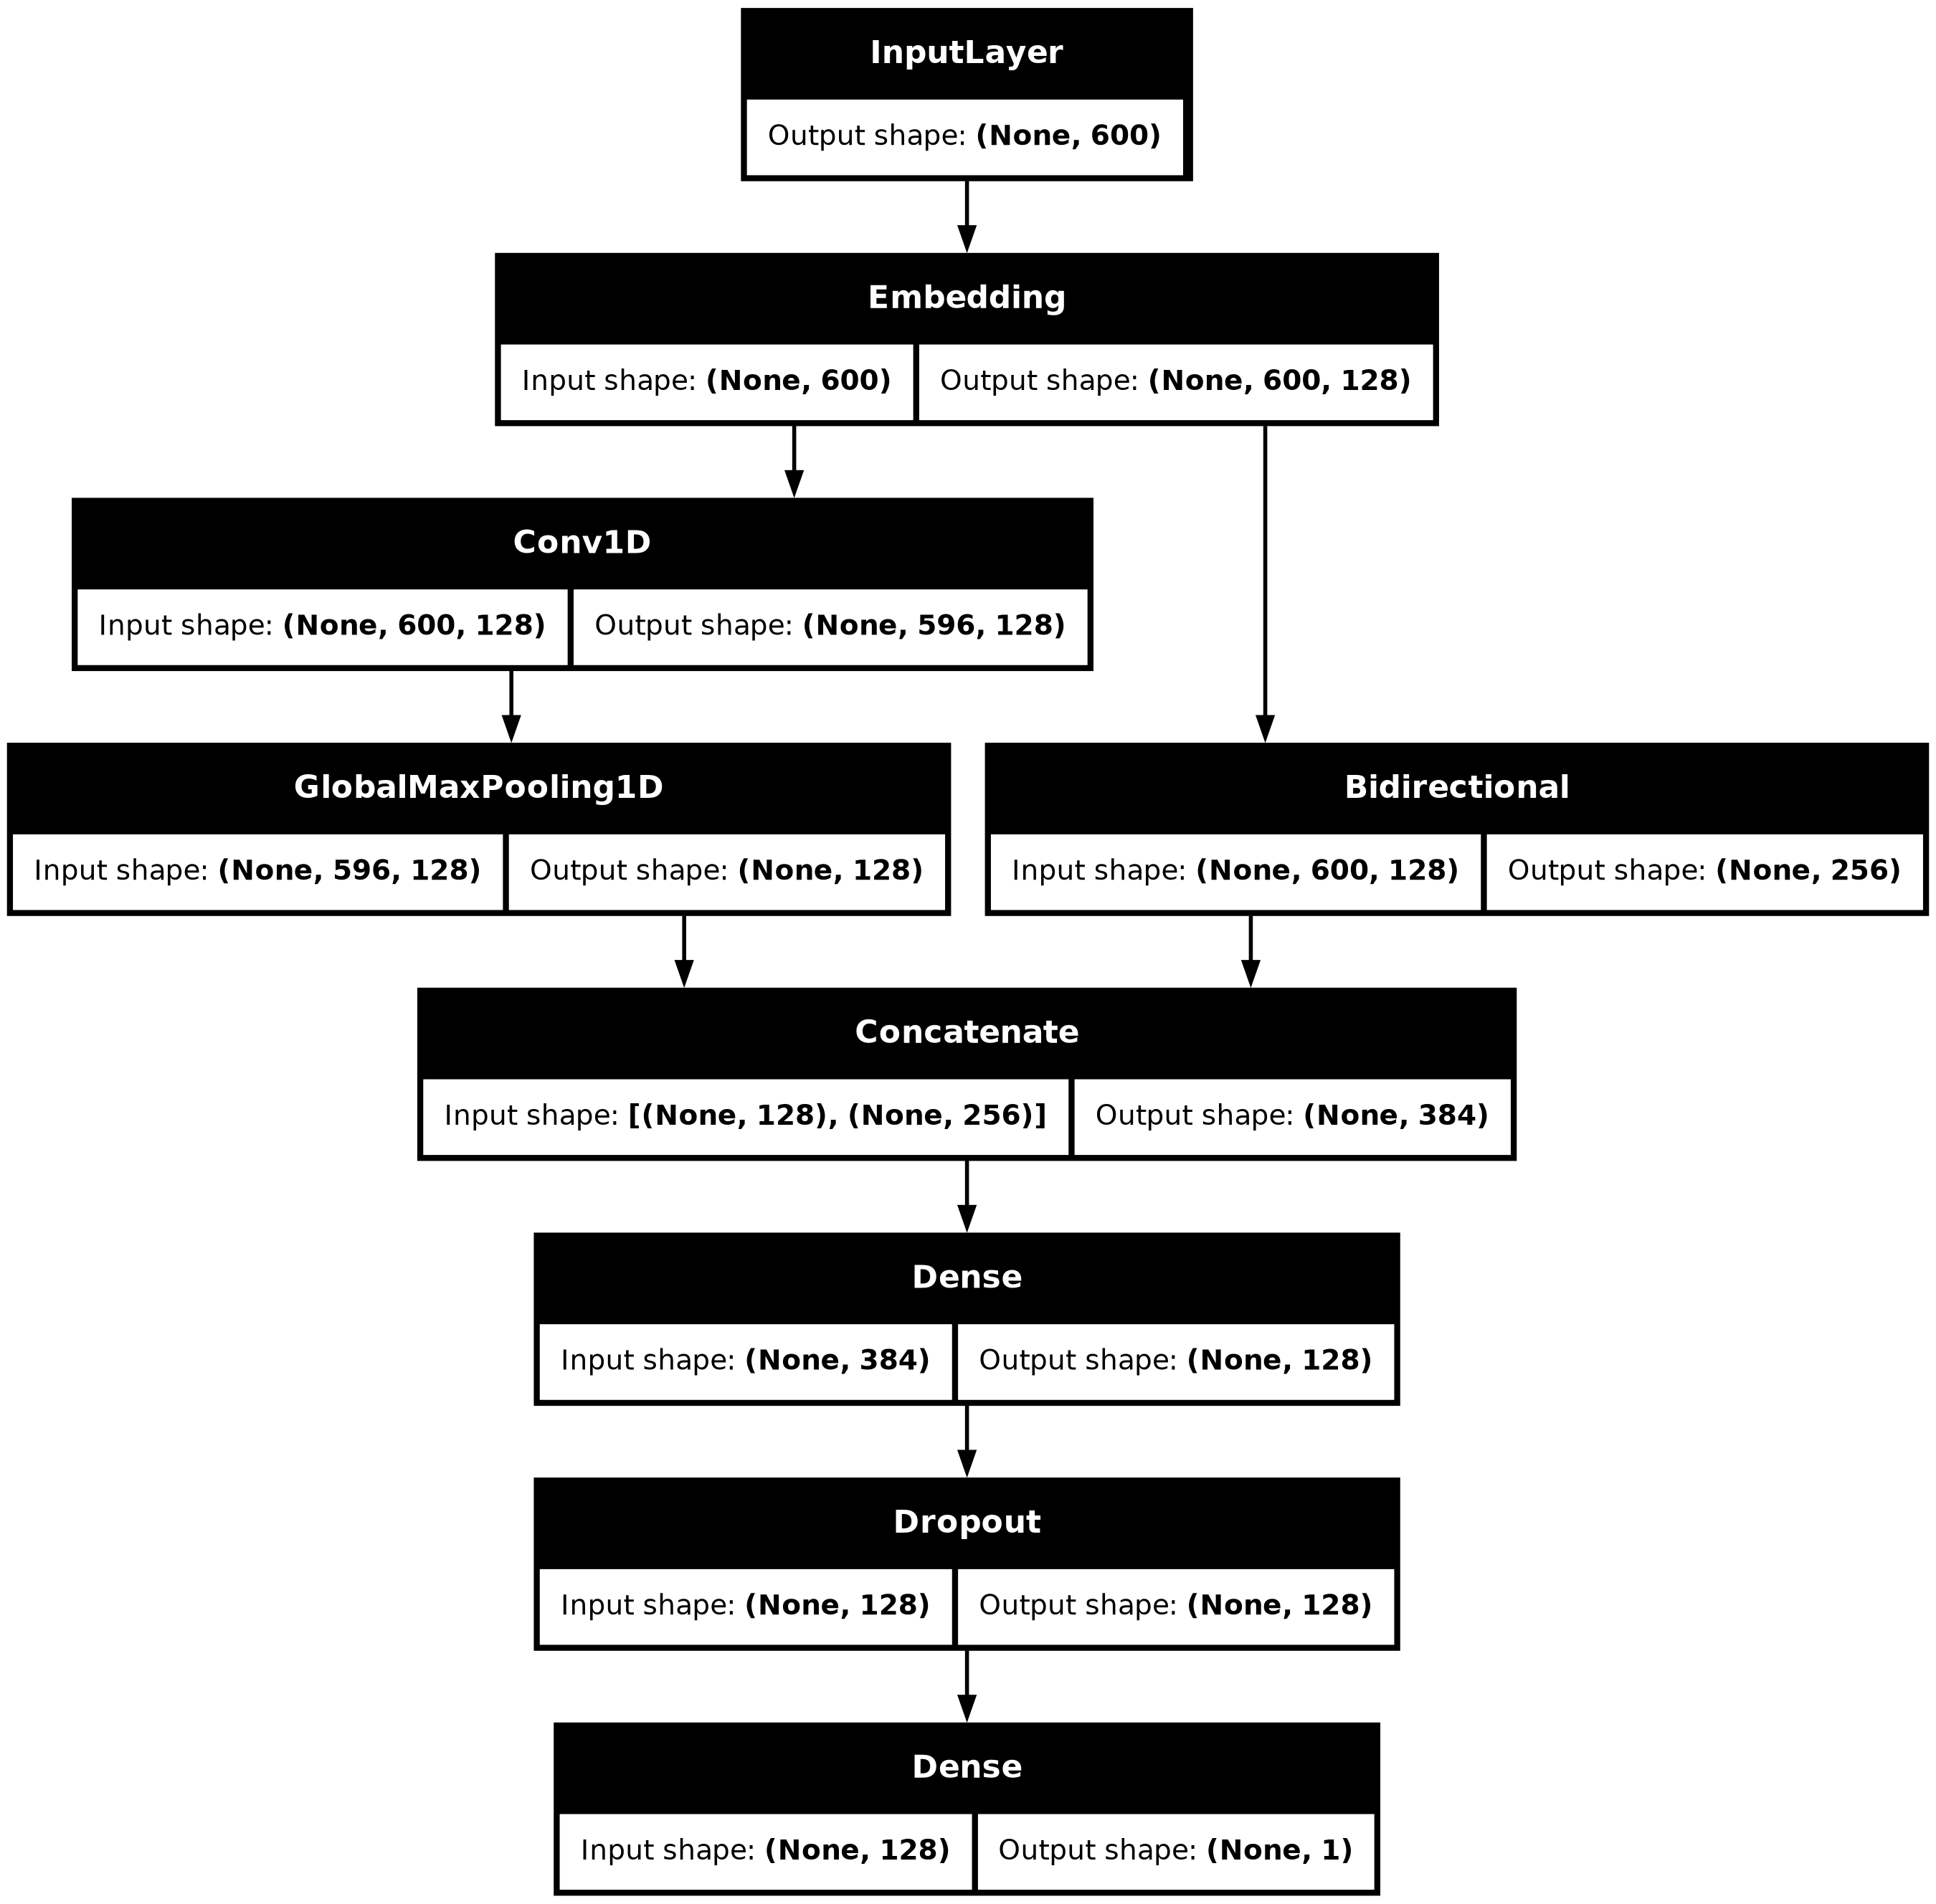

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [ ]:
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 172s 84ms/step - accuracy: 0.8576 - loss: 0.3123 - val_accuracy: 0.9424 - val_loss: 0.1604
Epoch 2/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 165s 84ms/step - accuracy: 0.9648 - loss: 0.1004 - val_accuracy: 0.9492 - val_loss: 0.1558
Epoch 3/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 165s 84ms/step - accuracy: 0.9832 - loss: 0.0496 - val_accuracy: 0.9478 - val_loss: 0.1811
Epoch 4/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 165s 84ms/step - accuracy: 0.9897 - loss: 0.0293 - val_accuracy: 0.9465 - val_loss: 0.2142
Epoch 5/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 164s 84ms/step - accuracy: 0.9922 - loss: 0.0218 - val_accuracy: 0.9495 - val_loss: 0.2344
Epoch 6/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 164s 84ms/step - accuracy: 0.9944 - loss: 0.0160 - val_accuracy: 0.9471 - val_loss: 0.3053
Epoch 7/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 164s 84ms/step - accuracy: 0.9949 - loss: 0.0145 - val_accuracy: 0.9463 - val_loss: 0.3369
Epoch 8/10
1959/1959 ━━━━━━━━━━━━━━━━━━━━ 164s 84ms/step - accuracy: 

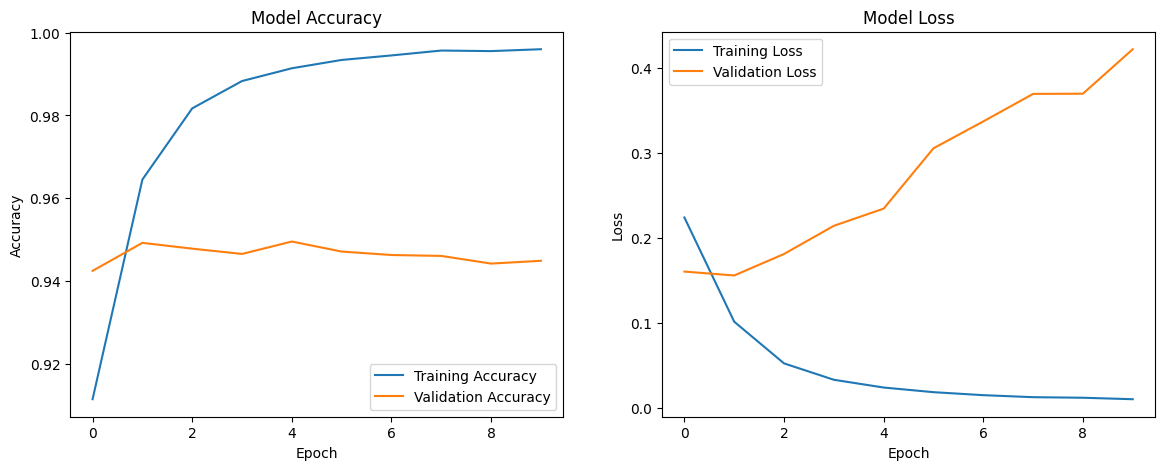

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


980/980 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9460 - loss: 0.4198
Test Accuracy: 94.49%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model

# Extract features from the CNN-BiLSTM model
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
X_train_features = feature_extractor.predict(X_train_pad)
X_test_features = feature_extractor.predict(X_test_pad)

# Train a Logistic Regression model with increased iterations
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_features, y_train)

# Predict and evaluate the Logistic Regression model
y_pred = lr_model.predict(X_test_features)
target_names = [str(cls) for cls in label_encoder.classes_]

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))


3918/3918 ━━━━━━━━━━━━━━━━━━━━ 111s 28ms/step
980/980 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14237
           1       0.96      0.94      0.95     17105

    accuracy                           0.95     31342
   macro avg       0.94      0.95      0.94     31342
weighted avg       0.95      0.95      0.95     31342



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model

# Extract features from the CNN-BiLSTM model
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
X_train_features = feature_extractor.predict(X_train_pad)
X_test_features = feature_extractor.predict(X_test_pad)

# Train an AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)
ada_model.fit(X_train_features, y_train)

# Predict and evaluate the AdaBoost model
y_pred = ada_model.predict(X_test_features)

# Ensure class labels are strings
target_names = [str(cls) for cls in label_encoder.classes_]

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

3918/3918 ━━━━━━━━━━━━━━━━━━━━ 111s 28ms/step
980/980 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14237
           1       0.95      0.95      0.95     17105

    accuracy                           0.95     31342
   macro avg       0.94      0.95      0.95     31342
weighted avg       0.95      0.95      0.95     31342



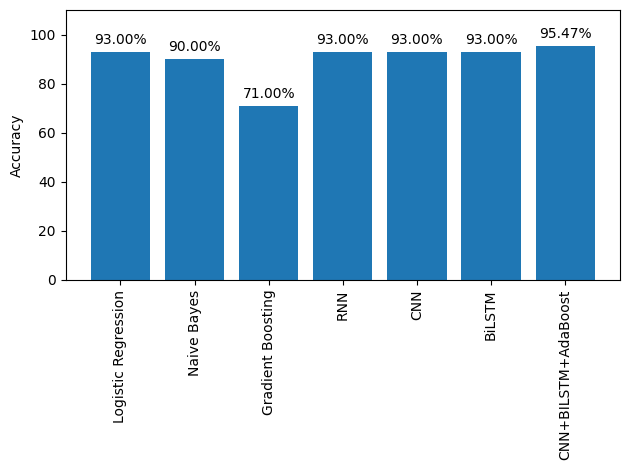

In [ ]:
import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Naive Bayes','Gradient Boosting','RNN','CNN','BiLSTM', 'CNN+BILSTM+AdaBoost']
accuracies = [0.93*100, .90*100,.71*100,0.93*100,0.93*100,.93*100, 95.47]


plt.bar(models, accuracies)
plt.ylabel('Accuracy')
# plt.title('Classifiers Accuracies')
plt.xticks(rotation='vertical')

# Display the accuracies at the top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 2, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 110)
plt.tight_layout()
plt.show()